In [6]:
from __future__ import print_function
import os

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [7]:
import pandas as pd
import seaborn as sns

data_path = ['../data/']
file_name = ['Iris_Data.csv']
file_path = os.sep.join(data_path+file_name)
iris_data = pd.read_csv(file_path)
print(iris_data.dtypes)
iris_data.head()

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [8]:
iris_data.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

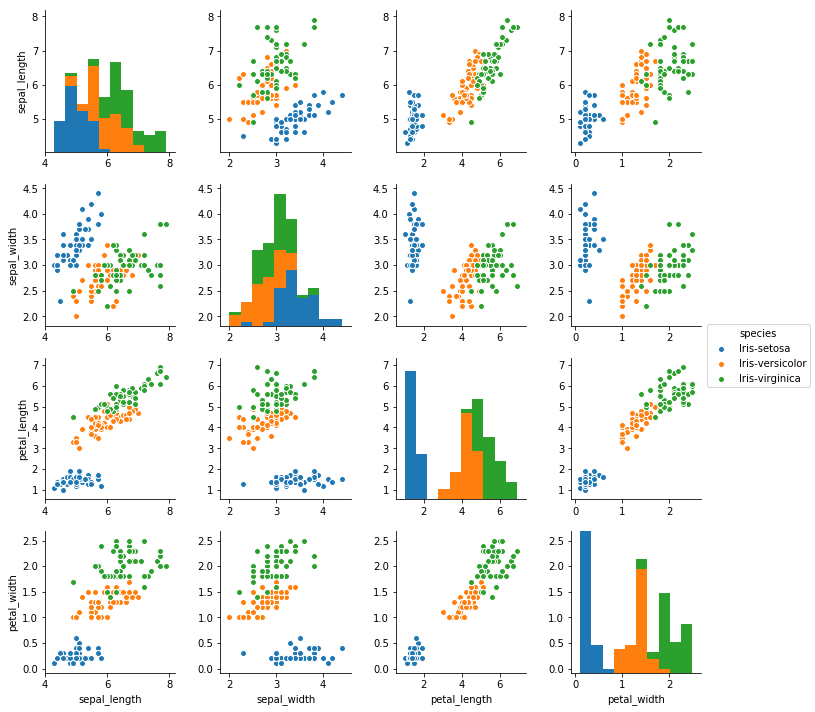

In [9]:
%matplotlib inline

sns.pairplot(iris_data,hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
X= iris_data[iris_data.columns[:-1]]
Y = iris_data.species
GB = GaussianNB()

score = cross_val_score(GB,X,Y,n_jobs=4,cv=4)
print(score)
score.mean()


[ 0.94871795  0.94871795  0.91666667  1.        ]


0.95352564102564097

In [13]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

models = {
    'gaussian':GaussianNB(),
    'multinomial':MultinomialNB(),
    'bernoulli':BernoulliNB()
}

n = 5
scores = {}
mean_vals = []
for key,model in models.items():
    score = cross_val_score(model,X,Y,n_jobs=n,cv=n)
    scores[key] = score
    
    

scores = pd.DataFrame(scores)
meandf = pd.DataFrame(scores.mean())
#meandf#= scores.columns
meandf = meandf.T
meandf.columns = scores.columns
meandf.index =[ 'Mean value']
pd.concat([scores,meandf],axis=0)


bernoulli  gaussian  multinomial
0            0.333333  0.933333     1.000000
1            0.333333  0.966667     0.966667
2            0.333333  0.933333     0.900000
3            0.333333  0.933333     0.900000
4            0.333333  1.000000     1.000000
Mean value   0.333333  0.953333     0.953333

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [18]:
models = {
    'gaussian':GaussianNB(),
    'multinomial':MultinomialNB(),
    'bernoulli':BernoulliNB()
}

X_data = iris_data[['petal_length','petal_width']]
Y_data = iris_data.species

n = 5
scores = {}
mean_vals = []
for key,model in models.items():
    score = cross_val_score(model,X_data,Y_data,n_jobs=n,cv=n)
    scores[key] = score
    
    

scores = pd.DataFrame(scores)
meandf = pd.DataFrame(scores.mean())

meandf = meandf.T
meandf.columns = scores.columns
meandf.index =[ 'Mean value']
pd.concat([scores,meandf],axis=0)


bernoulli  gaussian  multinomial
0            0.333333  0.966667     0.833333
1            0.333333  0.966667     0.733333
2            0.333333  0.933333     0.766667
3            0.333333  0.933333     0.766667
4            0.333333  1.000000     0.933333
Mean value   0.333333  0.960000     0.806667

### Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

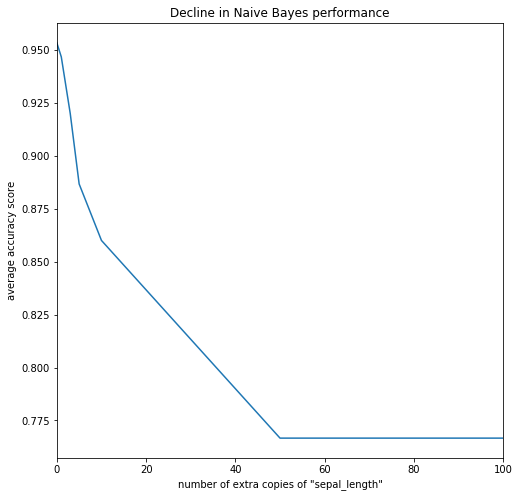

In [37]:
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
X = iris_data[iris_data.columns[:-1]]
Y = iris_data.species

n_copies = [0, 1, 3, 5, 10, 50, 100]

def create_copy_sepal_length(X,n):
    X_new = X.copy()
    for i in range(n):
        X_new['sepal_length_%s' % i] =  X['sepal_length']
    return X_new


def get_cross_val_score(n):
    X_new = create_copy_sepal_length(X,n)
    scores = cross_val_score(GaussianNB(),X_new,Y,n_jobs=5,cv=5)
    return np.mean(scores)


average_scores = pd.Series([get_cross_val_score(n) for n in n_copies],index=n_copies)
fig = plt.figure(figsize=(8,8))
ax = average_scores.plot()
ax.set(
    xlabel='number of extra copies of "sepal_length"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance');
    

### Question 6 - Naive Bayes on Human Activity Recongnition

In this question, we'll explore discretizing the dataset and then fitting MultinomialNB.  

* Load the Human Activity Recognition dataset. 
* Look at the data types. It's all continuous except for the target.
* Create `X` and `y` from `data`. `y` is the "Activity" column.
* Create training and test splits.
* Fit a GaussianNB to the training split.
* Get predictions on the test set.
* use `sns.heatmap` to plot the confusion matrix for predictions.

In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')

data_path = ['../data/']
file_name = ['Human_Activity_Recognition_Using_Smartphones_Data.csv']

file_path = os.sep.join(data_path+file_name)
humn_rec_data = pd.read_csv(file_path)


# print(humn_rec_data.dtypes)
le = LabelEncoder()
X = humn_rec_data.iloc[:,:-1]
Y = humn_rec_data.iloc[:,-1]
Y = pd.DataFrame([le.fit_transform(Y)]).T
np.unique(Y)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=0)

print(X_train.shape)
print(Y_train.shape)
GN = GaussianNB()
GN.fit(X_train,Y_train)
GN.score(X_test,Y_test)

(7209, 561)
(7209, 1)


0.74627831715210358

/'/aplha/$'